In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

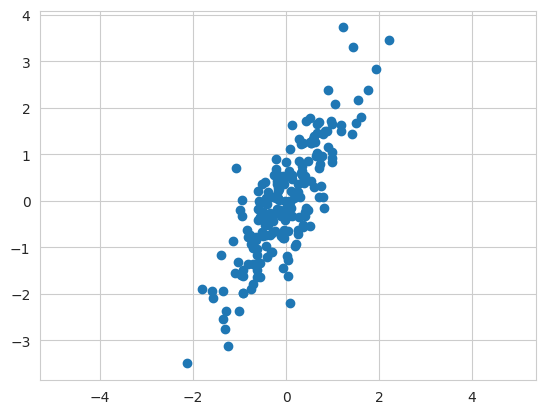

In [ ]:
sns. set_style('whitegrid')

rng = np.random.RandomState(13)
X = np.dot(rng.rand(2, 2), rng.randn(2, 200)).T   #2x2 난수 행렬 생성,
#2x200 크기의 표준 정규분포로부터 난수 행렬 생성, 이를 내적하여 200개의 2차원 데이터를 생성 후 X에 저장

X.shape

plt.scatter(X[:,0], X[:,1]) # 산점도
plt.axis('equal');  #x과 y의 축의 스케일을 같게 설정

In [ ]:
# PCA fit
from sklearn.decomposition import PCA

pca = PCA(n_components=2, random_state=0)    #n_components=2 : 주성분 개수를 2개로 지정
pca.fit(X)

# 벡터와 분산값
pca.components_  #주성분 벡터를 출력

array([[ 0.47802511,  0.87834617],
       [-0.87834617,  0.47802511]])

행 별로, 첫번째 주성분 PC1, 두번째 주성분 PC2를 나타낸다,

In [ ]:
pca.explained_variance_ # 분산 설명력; 값이 클수록 좋다
# pca.explained_variance_ratio_ : %로 나타낸다

array([1.82531406, 0.13209947])

explained_variance나 explained_variance_ratio를 사용하여 분산 설명력을 조회 할 수 있다.

값이 클수록 좋다.

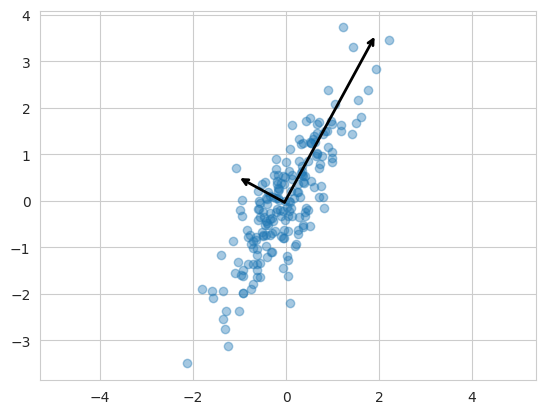

In [ ]:
# 주성분 벡터를 그릴 준비
def draw_vector(v0, v1, ax=None):   #함수정의, 두 점을 연결한는 화살표 그리는 함수
    ax = ax or plt.gca()
    arrowprops = dict(arrowstyle='->',
                      linewidth=2, color='black',
                      shrinkA=0, shrinkB=0)
    ax.annotate('', v1, v0, arrowprops=arrowprops)

plt.scatter(X[:, 0], X[:, 1], alpha=0.4)
for length, vector in zip(pca.explained_variance_, pca.components_):    #zip을 이용해 주성분 벡터와 분산의 크기를 묶어 순회
    v = vector * 3 * np.sqrt(length)         #주성분 벡터의 크기를 설정하여 크기 조절
    draw_vector(pca.mean_, pca.mean_ + v)
plt.axis('equal')
plt.show();

##데이터의 주성분을 찾은 다음 주축을 변경하는 것도 가능하다

In [ ]:
# 이번에는 n_components를 1로 두고
pca = PCA(n_components=1, random_state=13)    #componenets = 1로 설정하여 PCA 다시 적합
pca.fit(X)
X_pca = pca.transform(X)    # 주성분 축에서 원본 공간으로 데이터 역변환

print(pca.components_)
print(pca.explained_variance_)

[[0.47802511 0.87834617]]
[1.82531406]


n_components를 1로 두었기에 주성분도 1개가 나온다

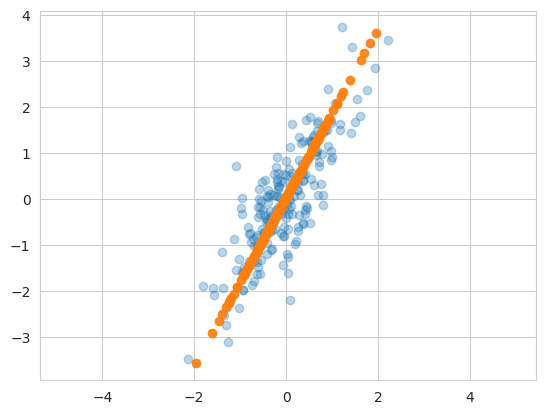

In [ ]:
X_new = pca.inverse_transform(X_pca)  #PCA로 변환된 데이터 X_pca를 원래 차원으로 복원해 X_new에 저장
plt.scatter(X[:, 0], X[:, 1], alpha=0.3)
plt.scatter(X_new[:, 0], X_new[:, 1], alpha=0.9)
plt.axis('equal')
plt.show();

Linear regression과 비슷한 결과처럼 보인다

##Iris 데이터를 이용한 차원 축소 실습

In [ ]:
import pandas as pd
from sklearn.datasets import load_iris

iris = load_iris()

iris_pd = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_pd['species'] = iris.target
iris_pd.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


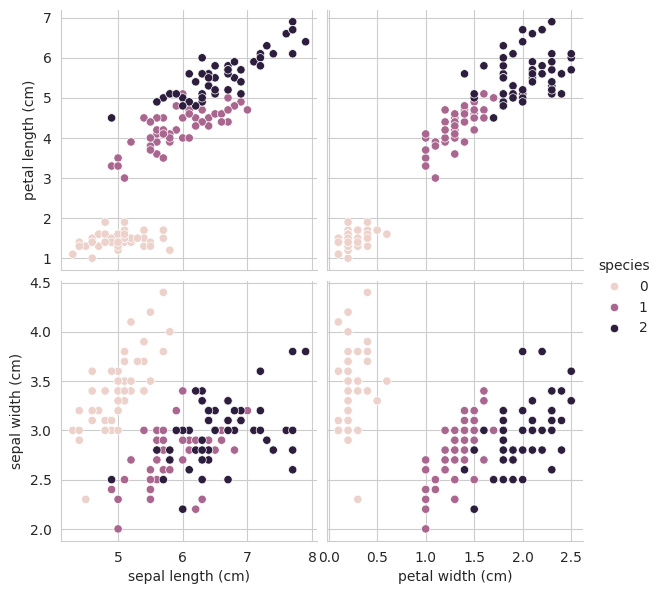

In [ ]:
# 특성 4개를 한번에 확인하기는 어렵다
sns.pairplot(iris_pd, hue='species', height=3,
             x_vars=['sepal length (cm)', 'petal width (cm)'],
             y_vars=['petal length (cm)', 'sepal width (cm)']);

sepal length와 sepal width 관계의 그래프를 봤을 떄
species 1,2가 분류가 어려운 것을 확인할 수 있다


In [ ]:
# 일단 SScaler 적용
from sklearn.preprocessing import StandardScaler

iris_ss = StandardScaler().fit_transform(iris.data)
iris_ss[:3]

array([[-0.90068117,  1.01900435, -1.34022653, -1.3154443 ],
       [-1.14301691, -0.13197948, -1.34022653, -1.3154443 ],
       [-1.38535265,  0.32841405, -1.39706395, -1.3154443 ]])

Standard Scaler를 적용하였다

PCA(주성분 분석)를 포함한 많은 차원 축소 기법은 데이터의 분산에 따라 주성분을 찾습니다. 따라서 데이터가 표준화되지 않으면 분산이 큰 특성에만 주로 의존하는 주성분이 만들어질 수 있습니다.

###PCA 4개 축

In [ ]:
# pca 결과를 return하는 함수도 하나 만들어 두고
from sklearn.decomposition import PCA

def get_pca_data(ss_data, n_components=4):
    pca = PCA(n_components=n_components)
    pca.fit(ss_data)

    return pca.transform(ss_data), pca
    #pca.transform(ss_data)는 주어진 데이터를 주성분 축으로 변환한 결과를 반환, pca는 PCA 객체 자체를 반환

# return 값 확인
iris_pca4, pca = get_pca_data(iris_ss, 4) # 4개의 특성을 2개로
iris_pca4.shape

(150, 4)

In [ ]:
# 주성분의 설명된 분산의 비율
explained_variance_ratio = pca.explained_variance_ratio_

# 요약을 위한 데이터프레임 생성
summary_df = pd.DataFrame({
    'PC': ['PC{}'.format(i+1) for i in range(len(explained_variance_ratio))],
    '변수 비율': explained_variance_ratio
})

# 요약 표시
summary_df

,PC,변수 비율
0,PC1,0.729624
1,PC2,0.228508
2,PC3,0.036689
3,PC4,0.005179


PC1, PC2 두 개만으로도 전체 데이터 분산의 95.8%를 보존.

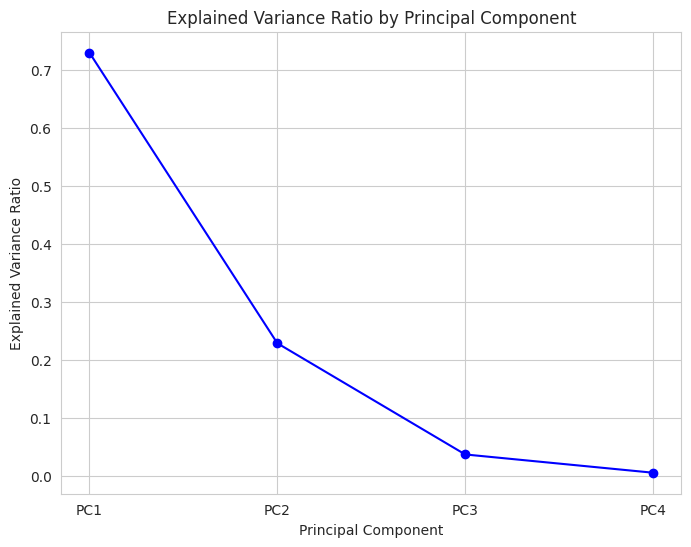

In [ ]:
# 데이터 생성
PC = ['PC1', 'PC2', 'PC3', 'PC4']
explained_variance_ratio = [0.729624, 0.228508, 0.036689, 0.005179]

# 선 그래프 그리기
plt.figure(figsize=(8, 6))
plt.plot(PC, explained_variance_ratio, marker='o', color='b', linestyle='-')
plt.title('Explained Variance Ratio by Principal Component')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.grid(True)
plt.show()

In [ ]:
from sklearn.decomposition import PCA

def get_pca_data(ss_data, n_components=2):
    pca = PCA(n_components=n_components)
    pca.fit(ss_data)

    return pca.transform(ss_data), pca
    #pca.transform(ss_data)는 주어진 데이터를 주성분 축으로 변환한 결과를 반환, pca는 PCA 객체 자체를 반환

# return 값 확인
iris_pca, pca = get_pca_data(iris_ss, 2) # 4개의 특성을 2개로
iris_pca.shape

(150, 2)

PCA 결과 형태는 (150, 2)로 4개의 특성이 2개로 줄어든 것을 볼 수 있다.

그럼 PCA 결과를 pandas로 정리해서 보자.

In [ ]:
def get_pd_from_pca(pca_data, cols=['pca_component_1', 'pca_component_2']):
    return pd.DataFrame(pca_data, columns=cols)

# 간단히 4개의 특성을 두 개의 특성으로 정리
iris_pd_pca = get_pd_from_pca(iris_pca)
iris_pd_pca['species'] = iris.target   #species열 추가
iris_pd_pca.head(5)

,pca_component_1,pca_component_2,species
0,-2.264703,0.480027,0
1,-2.080961,-0.674134,0
2,-2.364229,-0.341908,0
3,-2.299384,-0.597395,0
4,-2.389842,0.646835,0


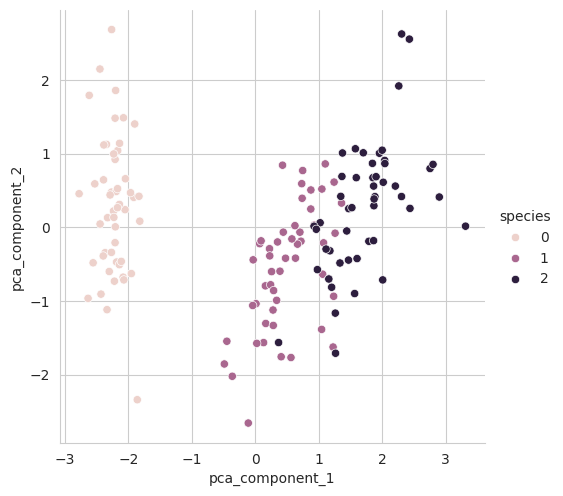

In [ ]:
sns.pairplot(iris_pd_pca, hue='species', height=5,
             x_vars=['pca_component_1'], y_vars=['pca_component_2']);

원래 데이터에 비해 훨씬 분류가 잘 되어 있다

###4개의 특성을 모두 사용한 randomforest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

# 모델 평가 측정 함수 생성
def rf_scores(X, y, cv=5):
    rf = RandomForestClassifier(random_state=13, n_estimators=100)  #n_estimator는 의사결정트리개수
    scores_rf = cross_val_score(rf, X, y, scoring='accuracy', cv=cv)

    print('Score :', np.mean(scores_rf))

# Scaling한 iris 데이터로 예측
rf_scores(iris_ss, iris.target)

Score : 0.96


###PCA 후 2개의 특성으로 randomforest

In [ ]:
pca_X = iris_pd_pca[['pca_component_1', 'pca_component_2']]
rf_scores(pca_X, iris.target)

Score : 0.9066666666666666


예측 결과는 91%로 기존 데이터로 예측한 결과보다는 낮지만, 데이터 차원을 감소시켰음에도 여전히 높은 예측 결과를 보인다.

이처럼, 주성분분석을 사용하여 피처/차원은 줄이되, 데이터를 나타내는 특징은 가지면서, 효율적으로 괜챃은 성능의 모델을 만들 수 있을 것 같다.

###LDA


In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

# LDA 결과를 return하는 함수 정의
def get_lda_data(ss_data, target, n_components=2):
    lda = LDA(n_components=n_components)
    lda.fit(ss_data, target)  # LDA는 클래스 레이블을 사용하여 학습합니다.

    return lda.transform(ss_data), lda

# Scaling된 iris 데이터를 LDA로 변환
iris_lda, lda = get_lda_data(iris_ss, iris.target, 2)  # 4개의 특성을 2개로

# 결과 확인
iris_lda.shape

(150, 2)

In [ ]:
def get_pd_from_lda(lda_data, cols=['lda_component_1', 'lda_component_2']):
    return pd.DataFrame(lda_data, columns=cols)

# 간단히 4개의 특성을 두 개의 특성으로 정리
iris_pd_lda = get_pd_from_lda(iris_lda)
iris_pd_lda['species'] = iris.target  # species 열 추가
iris_pd_lda.head(5)


,lda_component_1,lda_component_2,species
0,8.061800,-0.300421,0
1,7.128688,0.786660,0
2,7.489828,0.265384,0
3,6.813201,0.670631,0
4,8.132309,-0.514463,0


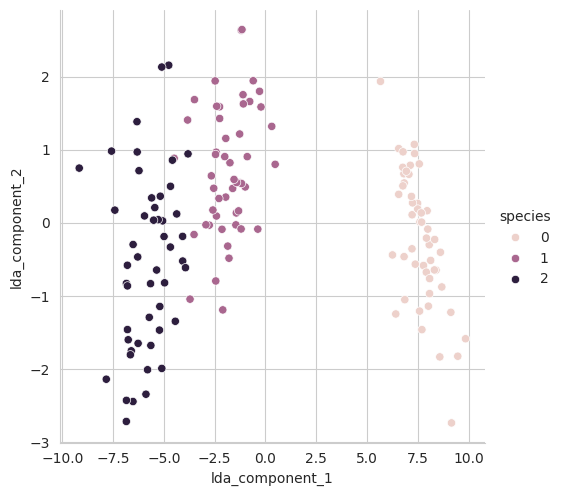

In [ ]:
sns.pairplot(iris_pd_lda, hue='species', height=5,
             x_vars=['lda_component_1'], y_vars=['lda_component_2']);


In [ ]:
lda_X = iris_pd_lda[['lda_component_1', 'lda_component_2']]
rf_scores(lda_X, iris.target)


Score : 0.9666666666666666


LDA를 이용해 차원 축소했는데 score 증가함 레전드;;

###SVD

In [ ]:
from sklearn.decomposition import TruncatedSVD

# SVD 결과를 반환하는 함수 정의
def get_svd_data(ss_data, n_components=2):
    svd = TruncatedSVD(n_components=n_components)
    svd_data = svd.fit_transform(ss_data)

    return svd_data, svd

# SVD 결과를 데이터프레임으로 변환하는 함수 정의
def get_pd_from_svd(svd_data, cols=['svd_component_1', 'svd_component_2']):
    return pd.DataFrame(svd_data, columns=cols)

# SVD 적용
iris_svd, svd = get_svd_data(iris_ss, 2)  # 4개의 특성을 2개로 줄임

# 데이터프레임으로 변환하여 species 열 추가
iris_pd_svd = get_pd_from_svd(iris_svd)
iris_pd_svd['species'] = iris.target
iris_pd_svd.head(5)

,svd_component_1,svd_component_2,species
0,-2.264703,0.480027,0
1,-2.080961,-0.674134,0
2,-2.364229,-0.341908,0
3,-2.299384,-0.597395,0
4,-2.389842,0.646835,0


PCA랑 똑같음 ㅅㄱ
PCA가 SVD의 알고리즘 방식으로 구현됐기 때문

###NMF

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Min-Max 스케일링 적용
minmax_scaler = MinMaxScaler()
iris_minmax = minmax_scaler.fit_transform(iris.data)
iris_minmax[:3]


array([[0.22222222, 0.625     , 0.06779661, 0.04166667],
       [0.16666667, 0.41666667, 0.06779661, 0.04166667],
       [0.11111111, 0.5       , 0.05084746, 0.04166667]])

In [ ]:
from sklearn.decomposition import NMF

# NMF 결과를 return하는 함수 정의
def get_nmf_data(ss_data, n_components=2):
    nmf = NMF(n_components=n_components)
    nmf_data = nmf.fit_transform(ss_data)

    return nmf_data, nmf

# Scaling된 iris 데이터를 NMF로 변환
iris_nmf, nmf = get_nmf_data(iris_minmax, 2)  # 4개의 특성을 2개로

# 결과 확인
iris_nmf.shape


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


(150, 2)

In [ ]:
def get_pd_from_nmf(nmf_data, cols=['nmf_component_1', 'nmf_component_2']):
    return pd.DataFrame(nmf_data, columns=cols)

# NMF 결과를 데이터프레임으로 변환하여 species 열 추가
iris_pd_nmf = get_pd_from_nmf(iris_nmf)
iris_pd_nmf['species'] = iris.target
iris_pd_nmf.head(5)

,nmf_component_1,nmf_component_2,species
0,0.018352,0.278349,0
1,0.019180,0.185266,0
2,0.009269,0.217110,0
3,0.012734,0.195678,0
4,0.014605,0.293896,0


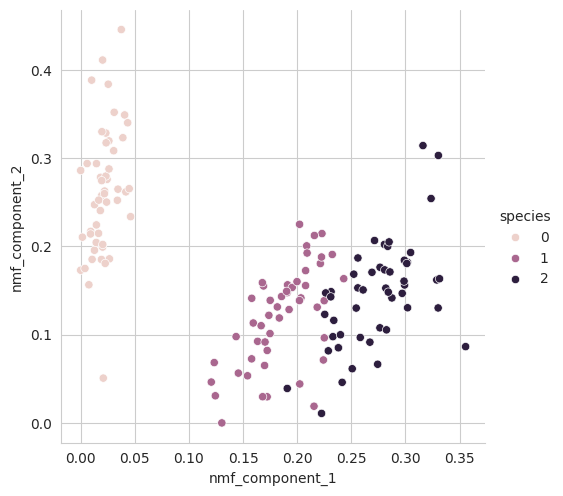

In [ ]:
sns.pairplot(iris_pd_nmf, hue='species', height=5,
             x_vars=['nmf_component_1'], y_vars=['nmf_component_2']);

In [ ]:
nmf_X = iris_pd_nmf[['nmf_component_1', 'nmf_component_2']]
rf_scores(nmf_X, iris.target)

Score : 0.96
